In [ ]:
!unzip "/content/drive/MyDrive/Edu/CV/ProjectData/train_test_dataset.zip" -d "data"

In [4]:
import glob

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.utils as utils
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras

In [6]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [7]:
train_path = "/content/data/train_test_dataset/train"
test_path =  "/content/data/train_test_dataset/test"

In [66]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
COLOR_MODE = "grayscale"

In [67]:
train_data = utils.image_dataset_from_directory(train_path,subset='training' ,validation_split=0.2, seed = 42, image_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                                color_mode=COLOR_MODE)
valid = utils.image_dataset_from_directory(train_path,subset='validation' ,validation_split=0.2, seed = 42,  image_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                           color_mode=COLOR_MODE) 
complete_data = utils.image_dataset_from_directory(train_path, image_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                                   color_mode=COLOR_MODE)

Found 200 files belonging to 5 classes.
Using 160 files for training.
Found 200 files belonging to 5 classes.
Using 40 files for validation.
Found 200 files belonging to 5 classes.


In [68]:
test_data = utils.image_dataset_from_directory(test_path, seed = 42, image_size=IMG_SIZE, batch_size=BATCH_SIZE, color_mode=COLOR_MODE)


Found 40 files belonging to 5 classes.


In [69]:
batch = train_data.as_numpy_iterator().next()

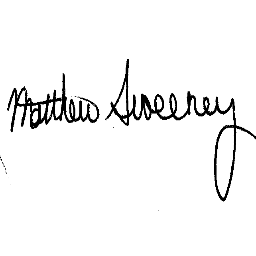

In [70]:
cv2_imshow(batch[0][0])

In [71]:
model = keras.Sequential()
model.add(keras.layers.Rescaling(1 / 255.0, input_shape=(*IMG_SIZE, 1)))
model.add(keras.layers.Conv2D(8, (10,10), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(16, (5,5), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, (3,3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, keras.activations.relu))
model.add(keras.layers.Dense(5, keras.activations.softmax))

In [72]:
model.compile(keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 247, 247, 8)       808       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 123, 123, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 119, 119, 16)      3216      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 57, 57, 32)       

In [74]:
model_checkpoint = keras.callbacks.ModelCheckpoint("checkpoints/e{epoch:02d}-loss{val_loss:.2f}.hdf5",
                                                   save_best_only = True,
                                                   initial_value_threshold=0.35)

In [76]:
model.fit(train_data, epochs=5, validation_data=valid, callbacks=[model_checkpoint])

Epoch 1/5
5/5 [==============================] - 1s 65ms/step - loss: 0.0273 - accuracy: 0.9937 - val_loss: 0.1673 - val_accuracy: 0.9500
Epoch 2/5
5/5 [==============================] - 1s 63ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9750
Epoch 3/5
5/5 [==============================] - 1s 60ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 1s 50ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9750
Epoch 5/5
5/5 [==============================] - 1s 49ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9500


In [78]:
model.fit(complete_data, epochs=1)
model.evaluate(test_data)

2/2 [==============================] - 0s 10ms/step - loss: 0.2313 - accuracy: 0.9250


[0.23127827048301697, 0.925000011920929]